A Dictionary which will accept user input and print the appropriate definition for it
1) Data will be loaded from a json file
2) Execption handling should be provided in case of wrong input
3) Case conversion error should be managed


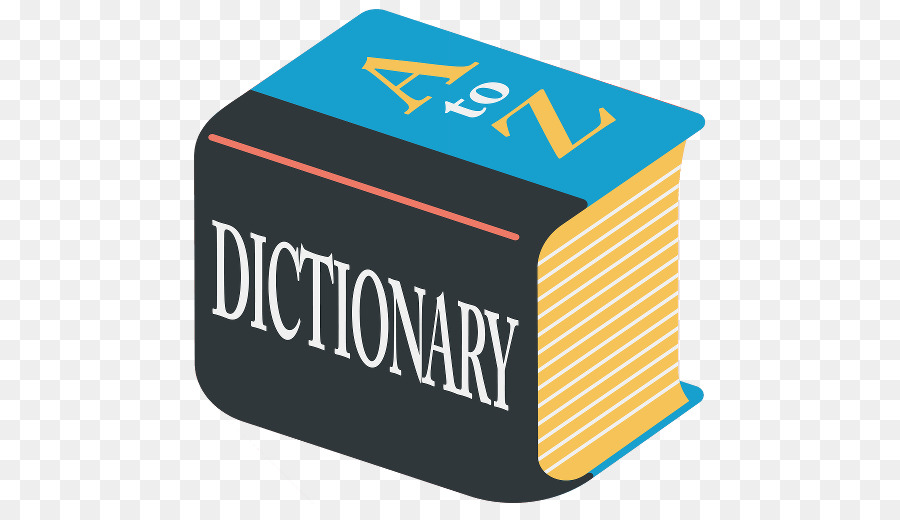

In [ ]:
#Google Speech Recognition
def display_text(audio):
    try:
        user_input = r.recognize_google(audio)
        print("You said:-\n" + user_input)
        return user_input
        #say("You said {}".format(r.recognize_google(audio)))
    except sr.UnknownValueError:
        print("Google Speech Recognition could not understand audio")
    except sr.RequestError as e:
        print("Could not request results from Google Speech Recognition service; {0}".format(e))


#Accepting user input
def user_input(): 
    #key = input("Please Enter a word whose definition you want to search for: ")
    engine.say("Please Enter a word whose definition you want to search for: ")
    engine.runAndWait()
    with sr.Microphone() as source:
        audio = r.record(source,duration = 2)
        key = display_text(audio)
        key = key.lower()#Statement used to convert user input to lower case
    if(key=='stop'):
        return -1
    return key

#Searching the word in the dictonary
def search(key):
    try:
       # print("\n")
       # print('Definition:- \n')
        value = data[key]
        for val in value:
            print('{key} = {value}'.format(key=key,value=val))
            engine.say(val)
            engine.runAndWait()
            break
    except:
        flag =  match(key)
        if(flag==0):
            print('No matching definition for {key}'.format(key=key))  

#If no exact match found then searching with matching words in the dictonary
def match(key):
    matches = get_close_matches(key,data)
    if not matches:
        return 0
    
    for value in range(len(matches)):
        print('Did you mean:- {val}'.format(val=matches[value]))
        engine.say("Did you mean:- {val}".format(val=matches[value]))
        engine.runAndWait()
        audio = r.record(source,duration = 2)
        opt = display_text(audio)
        #opt = (input(" Please put Y/N in input box:-   "))
        if(opt=='Yes'):
            for val in data[matches[value]]:
                print('{key} = {value}'.format(key=matches[value],value=val))
                engine.say(val)
                engine.runAndWait()
                flag = 1
            return 1;
        else:
            clear_output()
            if value is matches[-1]:
                print('No more similar words can be found, please continue with another word')
                engine.say('No more similar words can be found, please continue with another word')
                engine.runAndWait()
                return
            continue
        if flag!=1:
            return 0;

def dictionary():
    engine.say("Welcome to my Interactive Dictionary")
    engine.runAndWait()
    while(1):
        key = user_input()
        if(key!=-1):
            value = search(key)
        else:
            print('\nThank you for spending time with our application')
            engine.say("Thank you for spending time with our application, hope you enjoyed it..!")
            engine.runAndWait()
            return 

In [ ]:
#Speech recognition dictionary.
import pyttsx3 #Text to Speech
import speech_recognition as sr
import subprocess
from difflib import get_close_matches
from IPython.display import clear_output
import sys,json

def load():
    engine = pyttsx3.init()
    engine.setProperty('rate',170)
    engine.setProperty('voice', 'english+f3')
    data = json.load(open("data.json","r"))
    
dictionary()

In [ ]:
import pyttsx3
engine = pyttsx3.init() # object creation
""" RATE"""
rate = engine.getProperty('rate')   # getting details of current speaking rate
print (rate)                        #printing current voice rate
engine.setProperty('rate', 175)     # setting up new voice rate


"""VOLUME"""
volume = engine.getProperty('volume')   #getting to know current volume level (min=0 and max=1)
print (volume)                          #printing current volume level
engine.setProperty('volume',1.0)  
"""VOICE"""
voices = engine.getProperty('voices')#getting details of current voice
print('Length of voices = ' + str(len(voices)))
#engine.setProperty('voice', voices[10].id)
engine.setProperty('voice', 'english+f3')#changing index, changes voices. o for male
#engine.setProperty('voice', voices[1].id)   #changing index, changes voices. 1 for female

engine.say("Hello World!")
engine.say('My current speaking rate is ' + str(rate))
engine.runAndWait()
engine.stop()